# importig_prerequisites

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Excericise 4.1(1 Percolation)

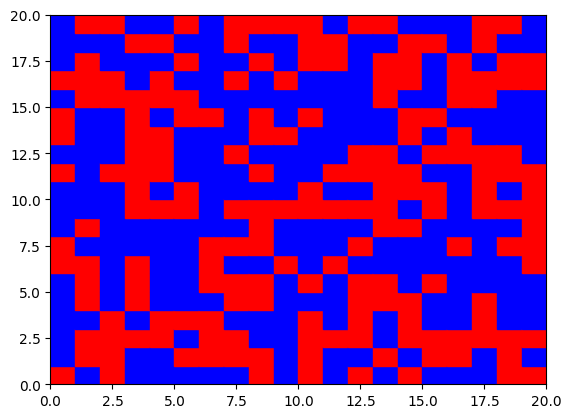

There is NO Infinite cluster


In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots()
L=20
# Set the limits for the plot
ax.set_xlim(0, L)
ax.set_ylim(0, L)

# Initialize variables
p = 0.5 # Probability threshold
A = []    # List to store blue square coordinates
B = []    # List to track connected components
a = 0     # Flag for infinite cluster detection
C = []    # Temporary list for checking connections

# Generate a 10x10 grid
for i in range(L):
    for j in range(L):
        Q = np.random.rand()  # Generate a random number between 0 and 1

        if Q >= p:  
            # If Q is greater than or equal to p, color the square blue
            square = plt.Rectangle((i, j), 1, 1, fill=True, facecolor='blue', edgecolor='blue', linewidth=1)
            ax.add_patch(square)
            A.append([i, j])  # Store the coordinates of blue squares
        else:
            # Otherwise, color the square red
            square = plt.Rectangle((i, j), 1, 1, fill=True, facecolor='red', edgecolor='red', linewidth=1)
            ax.add_patch(square)

# Show the grid with colored squares
plt.show()

# Identify blue squares in the last row (x = 9)
for k in A:
    if k[0] == L-1:
        B.append(k)  # Add them to B as potential starting points

# If there are blue squares in the last row, check for connectivity
if len(B) != 0:
    a = 1  # Assume an infinite cluster exists
    b = L-2  # Start checking from row 8 and move upwards

    while b >= 0:
        C = []  # Temporary list to track new connections

        # Check if there are any blue squares in row b that are directly above a square in B
        for l in A:
            for m in B:
                if l[0] == b and l[1] == m[1]:  # Same column but one row above
                    C.append(l)

        if len(C) == 0:  
            # If no connections are found, break and set a = 0 (no infinite cluster)
            a = 0
            break
        else:
            # Otherwise, update B with the newly found connections
            B = C
            b -= 1  # Move one row up

        # Check for horizontally connected squares
        for n in A:
            for o in B:
                if n[0] == o[0] and abs(n[1] - o[1]) == 1:  # Adjacent in the same row
                    if n not in B:
                        B.append(n)

# Print the result based on the flag a
if a == 0:
    print("There is NO Infinite cluster")
if a == 1:
    print("There is an Infinite cluster")


# Exercise 4.2(painting algorithm)

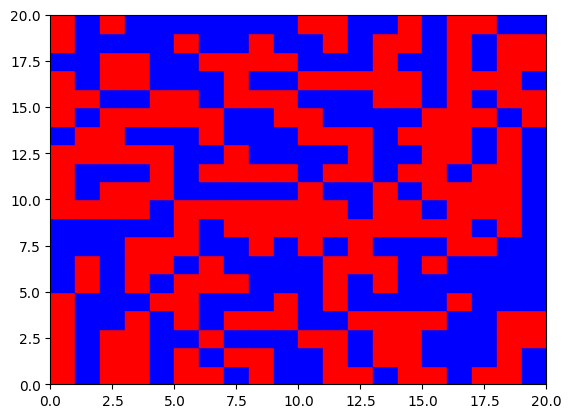

There is NO Infinite cluster


In [80]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Grid size
L = 20

# Create figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)

# Initialize variables
p = 0.5  # Probability threshold for coloring squares
A = []    # List of available cluster labels
B = []    # Unused in this version
a = 0     # Temporary variable
C = []    # Unused in this version
D = {}    # Dictionary to store cluster labels for each position
E = []    # Unused in this version

# Generate a list of unique labels for clusters
for i in range(2, (L**2) * 100):
    A.append(i)

# Initialize the dictionary D with boundary conditions
for i in range(-1, L+1):
    for j in range(-1, L+1):
        if i == 0:
            D[(i, j)] = 1  # Assign the top boundary cluster label
        if i == L - 1:
            D[(i, j)] = (L**2) * 100  # Assign the bottom boundary a large unique label
        if i != 0 and i != L - 1:
            D[(i, j)] = 0  # Default to 0 (unassigned)

# Iterate through the grid and assign cluster labels
for o in range(0, L):
    for j in range(0, L):
        Q = np.random.rand()  # Generate a random number

        if Q >= p:  
            # If Q is greater than or equal to p, color the square blue
            square = plt.Rectangle((o, j), width=1, height=1, fill=True, facecolor='blue', edgecolor='blue', linewidth=1)
            ax.add_patch(square)

            # Assign a random cluster label from A
            cluster_label = random.choices(A)[0]  
            D[(o, j)] = cluster_label
            A.pop(A.index(cluster_label))  # Remove assigned label from available list

            # Check neighbors for merging clusters
            a, F = 0, []  # a counts the number of adjacent blue clusters, F stores their labels

            # Check neighboring cells (right, left, up, down)
            if D[(o+1, j)] > 0:
                a += 1
                F.append(D[(o+1, j)])
            if D[(o-1, j)] > 0:
                a += 1
                F.append(D[(o-1, j)])
            if D[(o, j+1)] > 0:
                a += 1
                F.append(D[(o, j+1)])
            if D[(o, j-1)] > 0:
                a += 1
                F.append(D[(o, j-1)])

            if a == 0:
                pass  # No adjacent blue squares, keep the assigned cluster label
            elif a == 1:
                # If exactly one adjacent cluster exists, merge into that cluster
                D[(o, j)] = F[0]
            else:
                # If multiple adjacent clusters exist, unify them under the smallest label
                min_label = min(F)
                D[(o, j)] = min_label
                for i in D:
                    if D[i] in F:  # Replace all occurrences of F's labels with the minimum label
                        D[i] = min_label

        else:
            # If Q < p, color the square red (blocked site)
            square = plt.Rectangle((o, j), 1, 1, fill=True, facecolor='red', edgecolor='red', linewidth=1)
            ax.add_patch(square)

# Show the grid with colored squares
plt.show()

# Check if an infinite cluster (path from top to bottom) exists
b = 0  # Counter for the number of connected bottom cells

for i in range(L):
    if D[(L-1, i)] == 1:  # If the bottom row contains cluster label 1 (connected to the top)
        b += 1

# Print result based on the presence of an infinite cluster
if b > 0:
    print("There is an Infinite cluster")
else:
    print("There is NO Infinite cluster")


# Exercise 4.3( Hoshen-Kopelman)

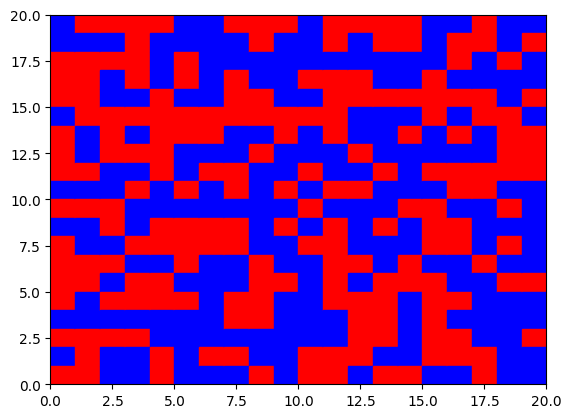

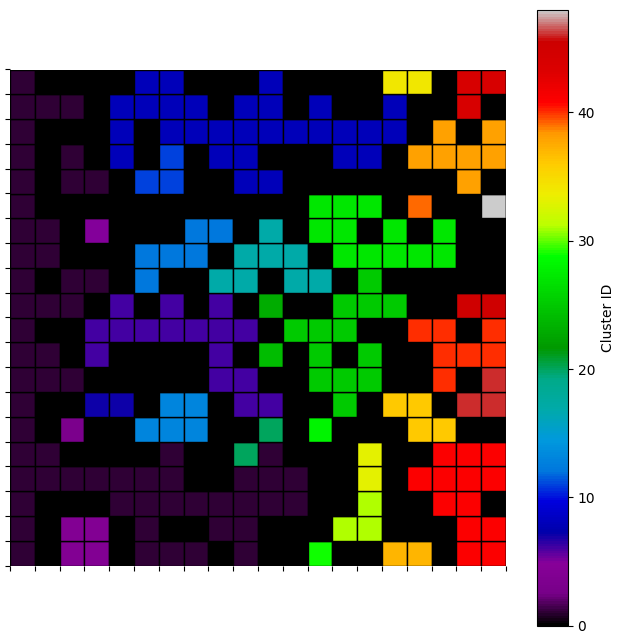

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# Define grid size
L = 20

# Create figure and axis for the first visualization
fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)

# Initialize data structures
D = {}  # Dictionary to store cluster labels
P = 0.5  # Probability of a site being open (blue)
M = [1]  # List to track unique cluster IDs

# Initialize the dictionary D with boundary conditions
for e in range(-1, L+1):
    for f in range(-1, L+1):
        if e == 0:
            D[(e, f)] = 1  # Top boundary is always occupied (cluster 1)
        else:
            D[(e, f)] = 0  # All other sites initially unoccupied

# Iterate through the grid to assign percolation clusters
for i in range(0, L):
    for j in range(L-1, -1, -1):  # Start from top row and move down
        Q = np.random.rand()  # Generate a random number

        if Q >= P:  
            # If Q is greater than or equal to P, color the square blue (open site)
            square = plt.Rectangle((i, j), width=1, height=1, fill=True, facecolor='blue', edgecolor='blue', linewidth=1)
            ax.add_patch(square)

            # Determine cluster ID for this site
            a, A = 0, []  # 'a' tracks number of adjacent clusters, 'A' stores their labels

            # Check adjacent sites (left and above)
            if D[(i-1, j)] != 0:
                a += 1
                A.append(D[(i-1, j)])
            if D[(i, j+1)] != 0:
                a += 1
                A.append(D[(i, j+1)])

            # Assign cluster ID based on neighbors
            if a == 0:
                D[(i, j)] = max(M)  # Assign new cluster ID
                M.append(max(M) + 1)  # Update available cluster IDs
            elif a == 1:
                D[(i, j)] = A[0]  # Inherit the single neighboring cluster ID
            elif a == 2:
                D[(i, j)] = A[0]  # Merge clusters, taking the smaller ID
                D[(i, j+1)] = A[0]  # Ensure consistency in merging

        else:
            # If Q < P, color the square red (blocked site)
            square = plt.Rectangle((i, j), 1, 1, fill=True, facecolor='red', edgecolor='red', linewidth=1)
            ax.add_patch(square)

# Show the first plot (grid with red and blue squares)
plt.show()

# Create figure for second visualization (colored clusters)
fig, ax = plt.subplots(figsize=(8, 8))

# Define colormap normalization based on cluster IDs
cmap = plt.cm.nipy_spectral
norm = plt.Normalize(min(D.values()), max(D.values()))

# Iterate through dictionary D and color grid according to cluster ID
for (x, y), value in D.items():
    color = cmap(norm(value))  # Assign a color based on cluster ID
    rect = patches.Rectangle((x, y), 1, 1, facecolor=color, edgecolor='black')
    ax.add_patch(rect)

# Configure grid display settings
ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_xticks(range(L+1))
ax.set_yticks(range(L+1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_frame_on(False)
ax.set_aspect('equal')

# Add color bar to indicate cluster values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label="Cluster ID")

# Show the second plot (clusters in different colors)
plt.show()


# Exceicise 4.4,4.5

Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
Q = 1.0
p = 1 success = 100 %
Q = 0.97
Q = 0.94
Q = 0.95
Q = 0.93
Q = 0.93
Q = 0.95
Q = 0.94
Q = 0.93
Q = 0.96
Q = 0.95
Q = 0.97
Q = 0.97
Q = 0.98
Q = 0.95
Q = 0.96
Q = 0.91
Q = 0.94
Q = 0.95
Q = 0.96
Q = 0.9

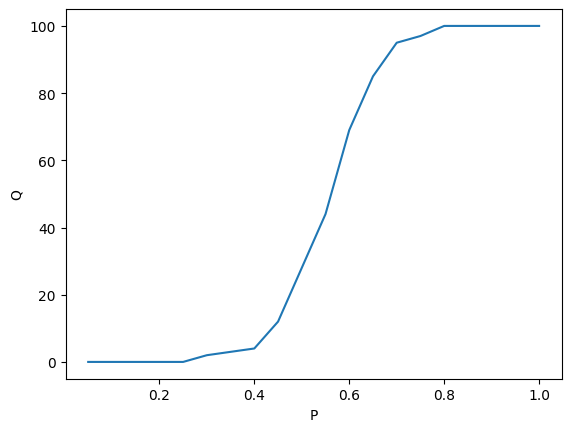

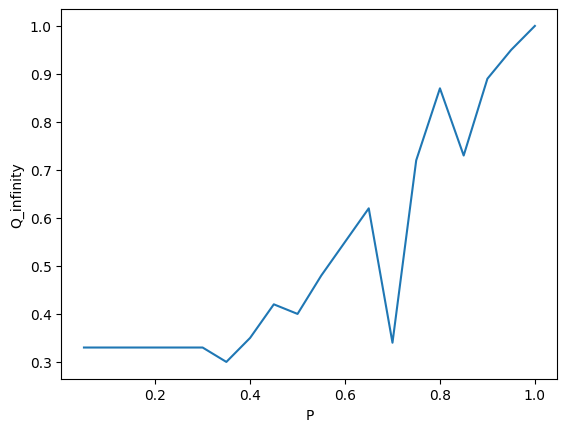

In [84]:
import random
import numpy as np

# Grid size
L = 10
Xlist,Ylist,Qlist=[],[],[]

# Probability of site being open
p, success = 0, 0  

# Loop over different values of p from 0 to 1 in increments of 0.05
while p <= 1:
    for _ in range(100):  # Run 100 simulations for each value of p
        M = [1]  # List to track unique cluster IDs
        A, D = [], {}  # A stores available cluster numbers, D stores site labels

        # Initialize available cluster numbers
        for i in range(2, (L**2) * 100):
            A.append(i)

        # Initialize dictionary D with boundary conditions
        for i in range(-1, L+1):
            for j in range(-1, L+1):
                if i == 0:
                    D[(i, j)] = 1  # Top boundary is always occupied (infinite cluster)
                elif i == L-1:
                    D[(i, j)] = (L**2) * 100  # Bottom boundary
                else:
                    D[(i, j)] = 0  # Unoccupied initially

        # Second dictionary C for tracking percolation clusters
        C = {}
        for e in range(-1, L+1):
            for f in range(-1, L+1):
                if e == 0:
                    C[(e, f)] = 1  # Top boundary cluster
                else:
                    C[(e, f)] = 0  # Other cells start as unoccupied

        # Fill the grid
        for o in range(0, L):  # Iterate through columns
            for j in range(L-1, -1, -1):  # Iterate from top to bottom row
                Q = np.random.rand()  # Generate a random number

                if Q >= p:  # If Q is greater than or equal to p, the site is open
                    D[(o, j)] = random.choices(A)[0]  # Assign a random cluster ID
                    A.pop(A.index(random.choices(A)[0]))  # Remove the chosen cluster ID

                    # Determine neighboring clusters
                    a, F = 0, []
                    if D[(o+1, j)] > 0:
                        a += 1
                        F.append(D[(o+1, j)])
                    if D[(o-1, j)] > 0:
                        a += 1
                        F.append(D[(o-1, j)])
                    if D[(o, j+1)] > 0:
                        a += 1
                        F.append(D[(o, j+1)])
                    if D[(o, j-1)] > 0:
                        a += 1
                        F.append(D[(o, j-1)])

                    # Merge clusters if needed
                    if a == 1:
                        D[(o, j)] = F[0]
                    elif a > 1:
                        D[(o, j)] = min(F)
                        for i in D:
                            if D[i] in F:
                                D[i] = min(F)

                    # Percolation check
                    c, B = 0, []
                    if C[(o-1, j)] != 0:
                        c += 1
                        B.append(C[(o-1, j)])
                    if C[(o, j+1)] != 0:
                        c += 1
                        B.append(C[(o, j+1)])

                    if c == 0:
                        C[(o, j)] = max(M)
                        M.append(max(M) + 1)
                    elif c == 1:
                        C[(o, j)] = B[0]
                    elif c == 2:
                        C[(o, j)] = B[0]
                        C[(o, j+1)] = B[0]

        # Check if percolation occurs
        b = 0
        for i in range(L):
            if D[(L-1, i)] == 1:
                b += 1

        # If percolation occurs, update success count and compute largest cluster size
        if b > 0:
            success += 1
            cluster_sizes = {}

            # Count occurrences of each cluster ID
            for i in range(1, max(C.values()) + 1):
                cluster_sizes[i] = 0
            for j in C.values():
                if j in cluster_sizes.keys():
                    cluster_sizes[j] += 1

            # Print the largest cluster size as a fraction of the grid
            print('Q =', round(max(cluster_sizes.values()) / 102, 2))

    # Print the success rate for the current probability p
    print('p =', round(1 - p, 2), 'success =', success, '%')
    Xlist.append(round(1 - p, 2))
    Ylist.append(success)
    Qlist.append(round(max(cluster_sizes.values()) / 102, 2))
    # Reset success counter and increment p
    success = 0
    p += 0.05
plt.plot(Xlist,Ylist)
plt.xlabel('P')
plt.ylabel('Q')
plt.show()
plt.plot(Xlist,Qlist)
plt.xlabel('P')
plt.ylabel('Q_infinity')
plt.show()

# Exericise 4.6,4.7

Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.83291770573577
Rg= 66.832

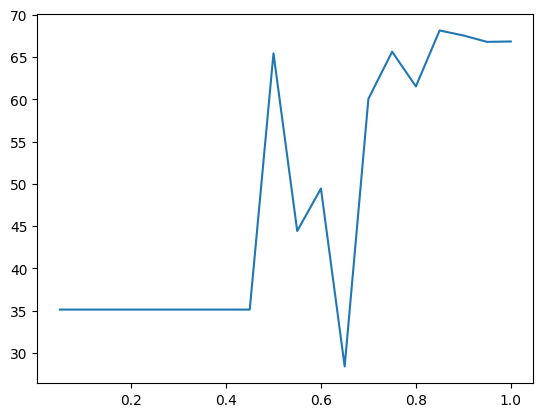

v= 2.853561764079362


In [86]:
import random  # Import random module
import matplotlib.patches as patches  # Import patches for visualization
from math import sqrt, log  # Import sqrt and log functions

L = 20 # Define grid size
p, success = 0, 0  # Initialize probability and success counter
P, Rg = [], []  # Lists to store probability and radius of gyration

while p <= 1:  # Loop through different probabilities
    for i in range(100):  # Run 100 simulations for each probability
        M = [1]  # Initialize cluster label list
        A, D = [], {}  # Initialize lists and dictionaries
        
        for i in range(2, (L**2) * 100):  # Generate unique labels for clusters
            A.append(i)
        
        for i in range(-1, L+1):  # Initialize the grid with boundary conditions
            for j in range(-1, L+1):
                if i == 0:
                    D[(i, j)] = 1  # Top boundary is part of the percolating cluster
                if i == L-1:
                    D[(i, j)] = (L**2) * 100  # Bottom boundary set to a large number
                if i != 0 and i != L-1:
                    D[(i, j)] = 0  # Other positions initialized as empty
        
        C = {}  # Initialize a dictionary for cluster labeling
        
        for e in range(-1, L+1):  # Initialize another cluster labeling dictionary
            for f in range(-1, L+1):
                if e == 0:
                    C[(e, f)] = 1  # Top row belongs to percolating cluster
                else:
                    C[(e, f)] = 0  # Other cells initially set to zero

        for o in range(0, L):  # Loop over grid
            for j in range(L-1, -1, -1):  # Iterate in reverse order for percolation
                Q = np.random.rand()  # Generate random number
                
                if Q >= p:  # Open site condition
                    D[(o, j)] = random.choices(A)[0]  # Assign a random label
                    A.pop(A.index(random.choices(A)[0]))  # Remove assigned label from list
                    
                    a, F = 0, []  # Initialize adjacency counter and list
                    
                    if D[(o+1, j)] > 0:  # Check right neighbor
                        a += 1
                        F.append(D[(o+1, j)])
                    if D[(o-1, j)] > 0:  # Check left neighbor
                        a += 1
                        F.append(D[(o-1, j)])
                    if D[(o, j+1)] > 0:  # Check top neighbor
                        a += 1
                        F.append(D[(o, j+1)])
                    if D[(o, j-1)] > 0:  # Check bottom neighbor
                        a += 1
                        F.append(D[(o, j-1)])

                    if a == 0:
                        True  # No connections
                    if a == 1:
                        D[(o, j)] = F[0]  # Assign single cluster label
                    if a > 1:
                        D[(o, j)] = min(F)  # Merge clusters
                        for i in D:  # Update all affected cluster labels
                            if D[i] in F:
                                D[i] = min(F)

                    c, B = 0, []  # Initialize cluster merging variables
                    
                    if C[(o-1, j)] != 0:  # Check left neighbor
                        c += 1
                        B.append(C[(o-1, j)])
                    if C[(o, j+1)] != 0:  # Check top neighbor
                        c += 1
                        B.append(C[(o, j+1)])

                    if c == 0:
                        C[(o, j)] = max(M)  # Assign new cluster label
                        M.append(max(M) + 1)  # Update cluster list
                    if c == 1:
                        C[(o, j)] = B[0]  # Assign single cluster label
                    if c == 2:
                        C[(o, j)] = B[0]  # Merge clusters
                        C[(o, j+1)] = B[0]  # Update cluster label
                else:
                    True  # Closed site, do nothing

        b = 0  # Initialize percolation success counter
        
        for i in range(L):  # Check bottom row for percolation
            if D[(L-1, i)] == 1:
                b += 1

        if b > 0:  # If percolation occurs
            success += 1  # Increment success counter
            tedad = {}  # Initialize cluster size dictionary
            
            for i in range(1, max(C.values()) + 1):  # Initialize cluster size dictionary
                tedad[i] = 0
            
            for j in C.values():  # Count occurrences of each cluster label
                if j in tedad.keys():
                    tedad[j] += 1
            
            inf = max(tedad.values())  # Find largest cluster size
            
            for ab in tedad:  # Identify the largest cluster
                if tedad[ab] == inf:
                    infinity = ab  # Store largest cluster label
            
            cow = []  # Store coordinates of largest cluster
            
            for i in C:  # Collect coordinates of largest cluster
                if C[i] == infinity:
                    if i[0] >= 0 and i[1] >= 0:
                        cow.append(i)

            first, second, count = 0, 0, 0  # Initialize center of mass variables
            
            for i in cow:  # Compute center of mass
                first += i[0]
                second += i[1]
                count += 1
            
            first = first / count  # Normalize x-coordinate of center of mass
            second = second / count  # Normalize y-coordinate of center of mass
            
            R_g = 0  # Initialize radius of gyration
            
            for i in cow:  # Compute radius of gyration
                R_g += (i[0]**2 + i[1]**2 - first**2 - second**2)
            print('Rg=',R_g / count)
        else:
            True  # No percolation

    print('p=', round(1 - p, 2))  # Print probability value
    P.append(round(1 - p, 2))  # Store probability
    Rg.append(R_g / count)  # Store normalized radius of gyration
    success = 0  # Reset success counter
    p += 0.05  # Increase probability step

maxR = Rg.index(max(Rg))  # Identify max radius of gyration
print()
print('Pc=', P[maxR])  # Print estimated percolation threshold

plt.plot(P, Rg)  # Plot radius of gyration vs. probability
plt.show()  # Display plot

print('v=', -1 / log(abs(P[maxR] - 0.5), L))  # Compute scaling exponent


# EXercise 4.8(Cluster Growth Percolation Algorithm)

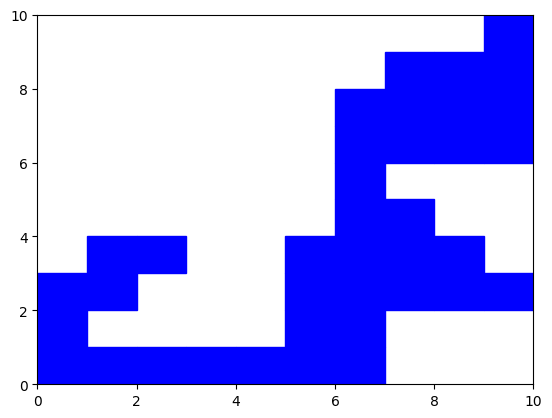

s = 43
R_g = 4.145149054189661


In [92]:
# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Set the x and y axis limits
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Initialize the cluster with the starting point at (0,0)
A = [[0, 0]]

# Set the probability threshold for growth
p = 0.59

# Iterate through the existing points in the cluster
for i in A:
    # Define potential new points for growth (right and up)
    B = [i[0], i[1] + 1]  # Move up
    C = [i[0] + 1, i[1]]  # Move right

    # Check if moving right is within bounds
    if i[0] + 1 <= 10:
        if C not in A:  # Ensure the point is not already in the cluster
            Q = np.random.rand()  # Generate a random number
            if Q <= p:  # Check if growth occurs
                A.append(C)  # Add the new point to the cluster

    # Check if moving up is within bounds
    if i[1] + 1 <= 10:
        Q = np.random.rand()  # Generate a random number
        if B not in A:  # Ensure the point is not already in the cluster
            if Q <= p:  # Check if growth occurs
                A.append(B)  # Add the new point to the cluster

# Plot the final cluster
for j in A:
    square = plt.Rectangle(j, width=1, height=1, fill=True, facecolor='blue', edgecolor='blue', linewidth=1)
    ax.add_patch(square)

# Display the plot
plt.show()

# Print the size of the cluster
print('s =', len(A))

# Calculate the center of mass
first, second, count = 0, 0, 0
for i in A:
    first += i[0]
    second += i[1]
    count += 1
first = first / count
second = second / count

# Compute the radius of gyration
R_g = 0
for i in A:  # Changed from 'cow' to 'A' (assuming 'cow' was a mistake)
    R_g += (i[0] ** 2 + i[1] ** 2 - first ** 2 - second ** 2)

# Print the radius of gyration
print('R_g =', sqrt(abs(R_g / count)))
